In [4]:
import sys
import os
import numpy as np
import pandas as pd

import mcfly
import tensorflow as tf
np.random.seed(2)

# Load data


In [5]:
from utils import tutorial_weather


In [6]:
X_train, X_test, y_train, y_test, map_path = tutorial_weather.load_data()


In [7]:
print(f'{X_train.shape=}')
print(f'{X_test.shape=}')
print(f'{y_train.shape=}')
print(f'{y_test.shape=}')

X_train.shape=(767, 89)
X_test.shape=(329, 89)
y_train.shape=(767,)
y_test.shape=(329,)


In [8]:
y_train.describe()


count    767.000000
mean       4.229074
std        3.853865
min        0.000000
25%        0.900000
50%        3.400000
75%        6.700000
max       15.200000
Name: MAASTRICHT_sunshine, dtype: float64

For Maastricht we have the following features in the dataset.

In [9]:
[e for e in X_train.columns if e[:5] == 'MAAST']

['MAASTRICHT_cloud_cover',
 'MAASTRICHT_humidity',
 'MAASTRICHT_pressure',
 'MAASTRICHT_global_radiation',
 'MAASTRICHT_precipitation',
 'MAASTRICHT_sunshine',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max']

The same features are available for all 18 locations below. We will use all features from all the locations to predict the sunshine in Maastricht on the next day.
![](https://zenodo.org/record/7053722/files/weather_prediction_dataset_map.jpg?download=1)


Let's have a look at the sunshine hours per day through the 3 years of data that we selected. The data is shuffled, so we need to sort it first to inspect any trends.

<AxesSubplot: >

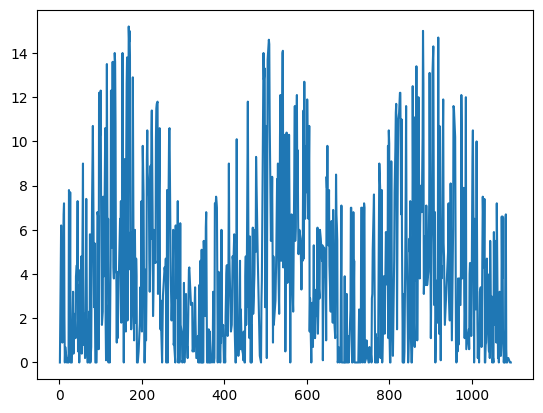

In [14]:
y_train.sort_index().plot()


In [25]:
metric = 'mean_squared_error'
models = mcfly.modelgen.generate_models(np.expand_dims(X_train.to_numpy(), 2),
                                        number_of_classes= 1,
                                        number_of_models = 8,
                                        metrics=[metric])


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

array([[[ 7.    ],
        [ 0.73  ],
        [ 1.0194],
        ...,
        [13.1   ],
        [ 9.9   ],
        [16.3   ]],

       [[ 2.    ],
        [ 0.54  ],
        [ 1.0154],
        ...,
        [19.9   ],
        [13.9   ],
        [25.9   ]],

       [[ 7.    ],
        [ 0.91  ],
        [ 0.9929],
        ...,
        [ 4.    ],
        [ 1.9   ],
        [ 6.    ]],

       ...,

       [[ 7.    ],
        [ 0.79  ],
        [ 1.0163],
        ...,
        [ 9.4   ],
        [ 5.1   ],
        [13.7   ]],

       [[ 7.    ],
        [ 0.82  ],
        [ 1.0134],
        ...,
        [16.8   ],
        [13.    ],
        [20.7   ]],

       [[ 0.    ],
        [ 0.81  ],
        [ 1.0341],
        ...,
        [ 3.6   ],
        [ 0.9   ],
        [ 6.3   ]]])